# Neural Mechanics Theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.patches as mpatches

# Symmetries & Gradient Projections

*Translation Symmetry*
$$y_1 = \frac{e^{w_1x}}{e^{w_1x} + e^{w_2x}} \qquad y_2 = \frac{e^{w_2x}}{e^{w_1x} + e^{w_2x}}$$

*Scale Symmetry*
$$$$

*Inverse Symmetry*
$$\mathcal{L}(w_1,w_2) = \frac{1}{2}(y - w_2w_1x)^2$$

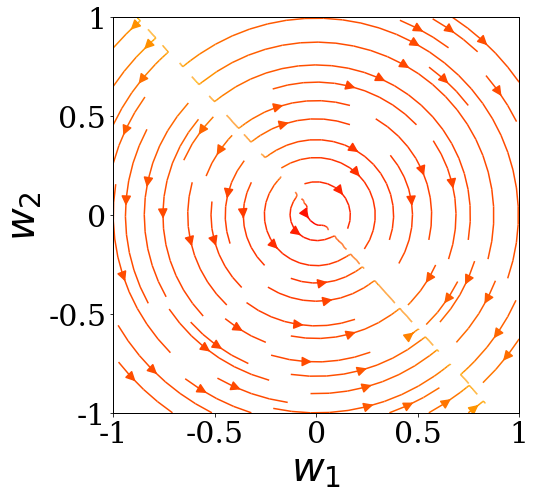

In [21]:
# Plot Specifics
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    cbar.ax.locator_params()#nbins=3
    return cbar
fig = plt.figure(figsize=(16,16))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

def translation(w1, w2):
    dy1 = np.random.randn(1)
    dy2 = np.random.randn(1)
    x = np.random.randn(1)
    
    y1 = np.exp(w1 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    y2 = np.exp(w2 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    
    dy1_a1 = y1 - y1**2
    dy1_a2 = -y1 * y2
    dy2_a1 = -y1 * y2
    dy2_a2 = y2 - y2**2
    
    dw1 = (dy1 * dy1_a1 + dy2 * dy2_a1) * x
    dw2 = (dy1 * dy1_a2 + dy2 * dy2_a2) * x
    
    return dw1, dw2

def scale(w1, w2):
    m = 32
    dY = np.random.randn(m)
    X1 = np.random.randn(m)
    X2 = np.random.randn(m)
    
    A = []
    for (x1, x2) in zip(X1, X2):
        A.append(w1 * x1 + w2 * x2)
    
    mu = 0
    for a in A:
        mu += a / m
    
    var = 0
    for a in A:
        var += (a - mu)**2 / m
    std = np.sqrt(var)# + 10**-10)
    
    dA = [0 for i in range(m)]
    for i in range(m):
        # dyi * dyi_dai
        dA[i] += dY[i] * ((1 - 1/m)/std - (A[i]-mu)**2/(m*std**3))
        for j in range(m):
            # dyj * dyj_dai
            if i is not j:
                dA[i] += dY[j] * ((-1/m)/std - (A[j]-mu)*(A[i]-mu)/(m*std**3))
    
    dw1 = 0
    dw2 = 0
    for (da, x1, x2) in zip(dA, X1, X2):
        dw1 += da * x1
        dw2 += da * x2
    
    return dw1, dw2

def inversion(w1, w2):
    dy = np.random.randn(1)
    x = np.random.randn(1)
    
    dw1 = dy * w2 *  x
    dw2 = dy  * w1 * x
    
    return dw1, dw2

# Vector Fields
n = 1
w1, w2 = np.meshgrid(np.linspace(-n, n, 50), np.linspace(-n, n, 50))
dw1, dw2 = scale(w1, w2)
M = np.hypot(dw1, dw2)

# Plot
ax = fig.add_subplot(221)
plt.xlim(-n, n)
plt.ylim(-n, n)
ax.set_xlabel('$w_1$', size=40, weight='light')
ax.set_ylabel('$w_2$', size=40, weight='light')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_yticks([-n,-n/2,0,n/2,n])
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_xticks([-n,-n/2,0,n/2,n])
strm = plt.streamplot(w1, w2, dw1, dw2, color=M, norm=matplotlib.colors.LogNorm(vmin=M.min(), vmax=M.max()), cmap='autumn_r', arrowsize=2, density=0.75)
# colorbar(strm.lines)
# plt.quiver(w1, w2, dw1, dw2)
for edge in ['bottom','top','right','left']:
    ax.spines[edge].set_linewidth(1)
    ax.spines[edge].set_color('k')
plt.savefig('inversion.pdf', format='pdf', bbox_inches='tight')

## 3D batch normalization

In [3]:
def scale_3D(w1, w2, w3):
    m = 32
    dY = np.random.randn(m)
    X1 = np.random.randn(m)
    X2 = np.random.randn(m)
    X3 = np.random.randn(m)
    
    A = []
    for (x1, x2, x3) in zip(X1, X2, X3):
        A.append(w1*x1 + w2*x2 + w3*x3)
    
    mu = 0
    for a in A:
        mu += a / m
    
    var = 0
    for a in A:
        var += (a - mu)**2 / m
    std = np.sqrt(var)
    
    dA = [0 for i in range(m)]
    for i in range(m):
        # dyi * dyi_dai
        dA[i] += dY[i] * ((1 - 1/m)/std - (A[i]-mu)**2/(m*std**3))
        for j in range(m):
            # dyj * dyj_dai
            if i is not j:
                dA[i] += dY[j] * ((-1/m)/std - (A[j]-mu)*(A[i]-mu)/(m*std**3))
    
    dw1 = 0
    dw2 = 0
    dw3 = 0
    for (da, x1, x2, x3) in zip(dA, X1, X2, X3):
        dw1 += da * x1
        dw2 += da * x2
        dw3 += da * x3
    
    return dw1, dw2, dw3

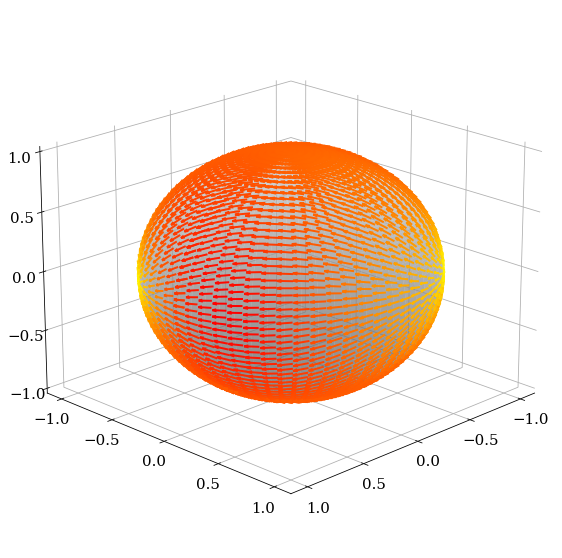

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# spherical grid
theta = np.linspace(0, 2*np.pi, 60)
phi = np.linspace(0, np.pi, 60)
r = 1

# cartesian grid
w1 = r * np.outer(np.cos(theta), np.sin(phi))
w2 = r * np.outer(np.sin(theta), np.sin(phi))
w3 = r * np.outer(np.ones(np.size(theta)), np.cos(phi))

# gradients
dw1, dw2, dw3 = scale_3D(w1, w2, w3)

# surface plot
ax.plot_surface(w1, w2, w3, rstride=1, cstride=1, color='w', shade=1, alpha=0.5)

# set viewing angle
azimuth, elev = 45, 20
ax.view_init(elev, azimuth )

# calculate the normal vector to the plane of vision
a = azimuth*np.pi/180. - np.pi
e = elev*np.pi/180. - np.pi/2.
n = [ np.sin(e) * np.cos(a),np.sin(e) * np.sin(a),np.cos(e)]

# condition where vectors are visable
dot = n[0]*w1 + n[1]*w2 + n[2]*w3
cond = (dot >= 0)

# filter points by the above condition
dw1_c, w1_c = dw1[cond], w1[cond]
dw2_c, w2_c = dw2[cond], w2[cond]
dw3_c, w3_c = dw3[cond], w3[cond]

# color map
c = np.sqrt(dw1_c**2 + dw2_c**2 + dw3_c**2).flatten()
c = (c.ravel() - c.min()) / c.ptp()
c = np.concatenate((c, np.repeat(c, 2)))

# quiver plot
q = ax.quiver(w1_c, w2_c, w3_c, dw1_c, dw2_c, dw3_c, length=0.1, normalize=True, lw=2, colors=plt.cm.autumn_r(c), pivot="middle")

# plot style
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks([-r,-r/2,0,r/2,r])
ax.set_xticks([-r,-r/2,0,r/2,r])
ax.set_zticks([-r,-r/2,0,r/2,r])
ax.w_xaxis.pane.set_color('w');
ax.w_yaxis.pane.set_color('w');
ax.w_zaxis.pane.set_color('w');
plt.savefig('scale-3d.pdf', format='pdf', bbox_inches='tight')

# Conservation and Geometry

/home/kunin/py3/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


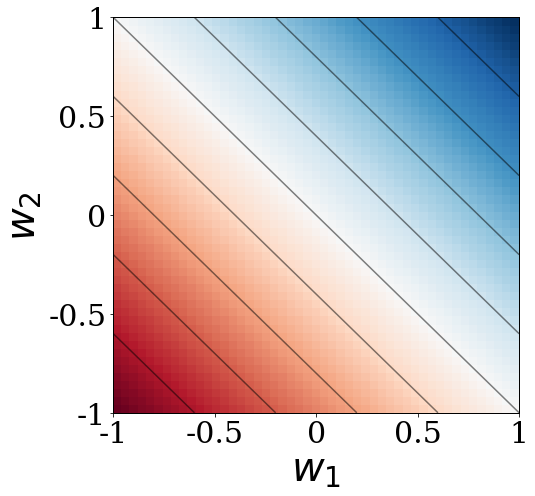

In [5]:
# Plot Specifics
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    cbar.ax.locator_params()#nbins=3
    return cbar
fig = plt.figure(figsize=(16,16))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

def translation(w1, w2):
    return w1 + w2

def scale(w1, w2):
    return w1**2 + w2**2

def inversion(w1, w2):
    return w2**2 - w1**2

# Vector Fields
n = 1
w1, w2 = np.meshgrid(np.linspace(-n, n, 50), np.linspace(-n, n, 50))
Z = translation(w1, w2)

# Plot
ax = fig.add_subplot(221)
plt.xlim(-n, n)
plt.ylim(-n, n)
ax.set_xlabel('$w_1$', size=40, weight='light')
ax.set_ylabel('$w_2$', size=40, weight='light')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_yticks([-n,-n/2,0,n/2,n])
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_xticks([-n,-n/2,0,n/2,n])
cmap = 'Blues'
if (Z < 0).any():
    cmap = 'RdBu'
ax.contour(w1, w2, Z, levels=10, colors='black', alpha=0.5, linestyles='solid')
ax.pcolormesh(w1, w2, Z, cmap=cmap)
for edge in ['bottom','top','right','left']:
    ax.spines[edge].set_linewidth(1)
    ax.spines[edge].set_color('k')
plt.savefig('translation.pdf', format='pdf', bbox_inches='tight')

# Modified Loss

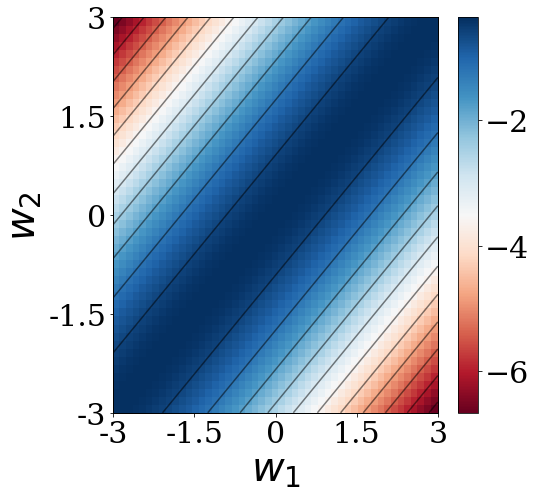

In [23]:
# Plot Specifics
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    cbar.ax.locator_params()#nbins=3
    return cbar
fig = plt.figure(figsize=(16,16))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

def translation(w1, w2):
    dy1 = np.random.randn(1)
    dy2 = np.random.randn(1)
    x = np.random.randn(1)
    
    y1 = np.exp(w1 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    y2 = np.exp(w2 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    
    dy1_a1 = y1 - y1**2
    dy1_a2 = -y1 * y2
    dy2_a1 = -y1 * y2
    dy2_a2 = y2 - y2**2
    
    dw1 = (dy1 * dy1_a1 + dy2 * dy2_a1) * x
    dw2 = (dy1 * dy1_a2 + dy2 * dy2_a2) * x
    
    return dw1**2 + dw2**2

def scale(w1, w2):
    m = 32
    dY = np.random.randn(m)
    X1 = np.random.randn(m)
    X2 = np.random.randn(m)
    
    A = []
    for (x1, x2) in zip(X1, X2):
        A.append(w1 * x1 + w2 * x2)
            
    mu = 0
    for a in A:
        mu += a / m
    
    var = 0
    for a in A:
        var += (a - mu)**2 / m
    std = np.sqrt(var)# + 10**-10)
    
    dA = [0 for i in range(m)]
    for i in range(m):
        # dyi * dyi_dai
        dA[i] += dY[i] * ((1 - 1/m)/std - (A[i]-mu)**2/(m*std**3))
        for j in range(m):
            # dyj * dyj_dai
            if i is not j:
                dA[i] += dY[j] * ((-1/m)/std - (A[j]-mu)*(A[i]-mu)/(m*std**3))
    
    dw1 = 0
    dw2 = 0
    for (da, x1, x2) in zip(dA, X1, X2):
        dw1 += da * x1
        dw2 += da * x2
    
    return dw1**2 + dw2**2

def inversion(w1, w2):
    dy = np.random.randn(1)
    x = np.random.randn(1)
    
    dy = (dy - w2 * w1 * x)
    
    dw1 = dy * w2 *  x
    dw2 = dy  * w1 * x
    
    return dw1**2 + dw2**2

# Vector Fields
n = 3
w1, w2 = np.meshgrid(np.linspace(-n, n, 50), np.linspace(-n, n, 50))
Z = np.log(translation(w1, w2))

# Plot
ax = fig.add_subplot(221)
plt.xlim(-n, n)
plt.ylim(-n, n)
ax.set_xlabel('$w_1$', size=40, weight='light')
ax.set_ylabel('$w_2$', size=40, weight='light')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_yticks([-n,-n/2,0,n/2,n])
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_xticks([-n,-n/2,0,n/2,n])
cmap = 'Blues'
if (Z < 0).any():
    cmap = 'RdBu'
ax.contour(w1, w2, Z, levels=10, colors='black', alpha=0.5, linestyles='solid')
colorbar = ax.pcolormesh(w1, w2, Z, cmap=cmap)
plt.colorbar(colorbar)
for edge in ['bottom','top','right','left']:
    ax.spines[edge].set_linewidth(1)
    ax.spines[edge].set_color('k')
plt.savefig('modified-loss.pdf', format='pdf', bbox_inches='tight')

# Modified Equation Analysis

## Illustrative Example

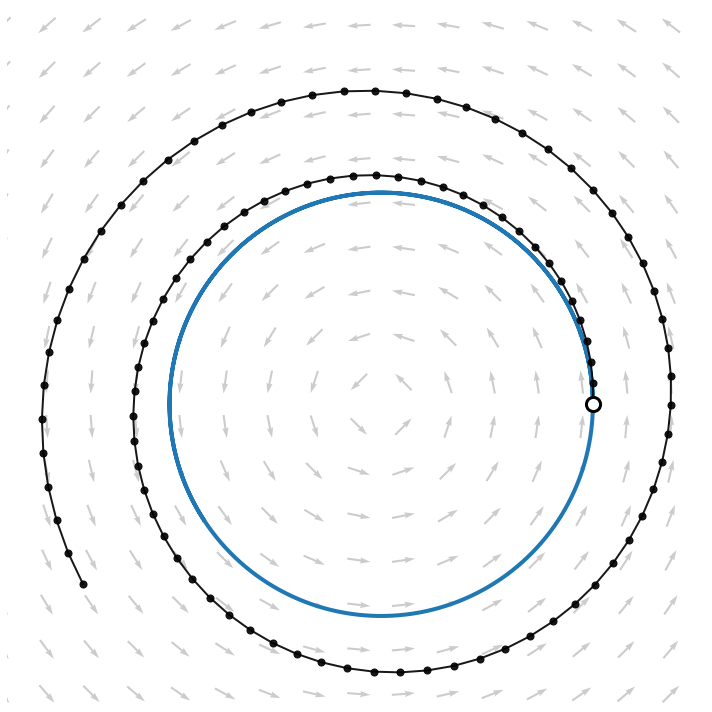

In [48]:
def gradient_flow(w10, w20, time):
    w1 = [w10]
    w2 = [w20]
    for t in time:
        w1.append(np.cos(t))
        w2.append(np.sin(t))
    return w1, w2

def gradient_descent(w10, w20, num_steps, eta):
    w1 = [w10]
    w2 = [w20]
    for i in range(num_steps):
        g1 = -w2[-1] * eta
        g2 = w1[-1] * eta
        w1.append(w1[-1] + g1)
        w2.append(w2[-1] + g2)
    return w1, w2


def modified_eq(w1, w2, time, eta):
    w1 = [w10]
    w2 = [w20]
    for t in time:
        w1.append(np.exp(eta/2 * t) * np.cos(t))
        w2.append(np.exp(eta/2 * t) * np.sin(t))
    return w1, w2

eta=0.1    
num_steps = 100
T = num_steps * eta
w10 = 1
w20 = 0
time = np.linspace(0, T, 100000)
gf_1, gf_2 = gradient_flow(w10, w20, time)
gd_1, gd_2 = gradient_descent(w10, w20, num_steps, eta)
# me_1, me_2 = modified_eq(w10, w20, time, eta)


plt.figure(figsize=(10,10))
plt.plot(gf_1, gf_2, color=plt.cm.tab10(0), label='Gradient Flow', lw=4)
# plt.plot(me_1, me_2, color=plt.cm.tab10(3), label='Modified Equation', lw=4)
plt.scatter(gd_1, gd_2, color='k', alpha=0.9, label='Gradient Descent', zorder=100, s=50)
plt.plot(gd_1, gd_2, color='k', alpha=0.9, label='Gradient Descent', lw=2)
plt.scatter(w10, w20, color='w', zorder=120, s=200, edgecolors='k', linewidth=3)
plt.axis('square')
plt.axis('off')
plt.yticks([])
plt.xticks([])

w1, w2 = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
dw1 = -w2 / np.sqrt(w2**2 + w1**2)
dw2 = w1 / np.sqrt(w2**2 + w1**2)
plt.quiver(w1, w2, dw1, dw2, color='k', alpha=0.2, pivot='mid', scale=30)

plt.tight_layout()
plt.savefig('modified-equation.pdf', format='pdf', bbox_inches='tight')

## Quadtratic Loss

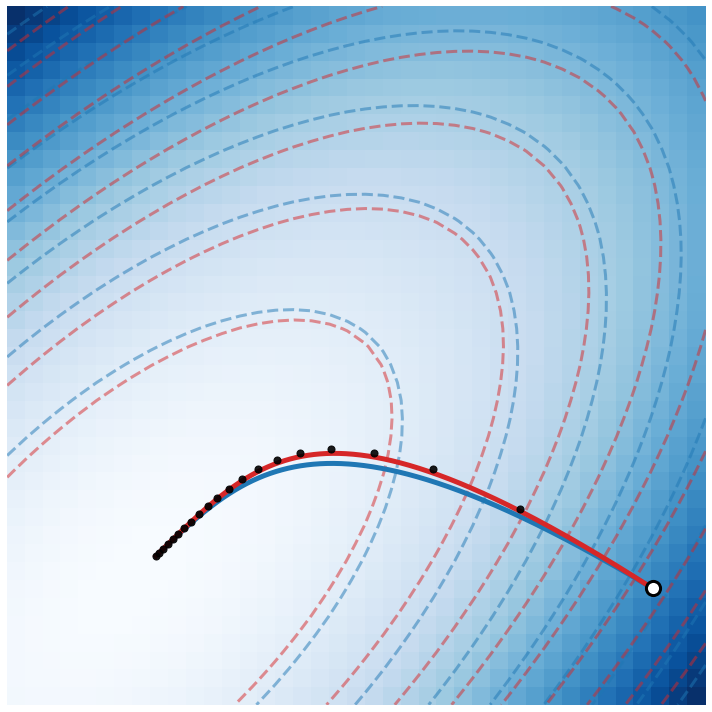

In [74]:
Sigma = np.array([4,1])
V = np.array([[-1,1],[1,1]])
V_inv = np.linalg.inv(V)
A = V_inv.dot(np.diag(Sigma)).dot(V)

def gradient_flow(w10, w20, time, Sigma, V, V_inv):
    W_0 = np.array([w10, w20])
    w1 = [W_0[0]]
    w2 = [W_0[1]]
    for t in time:
        scale = np.diag(np.exp(-Sigma * t))
        W_t = V_inv.dot(scale.dot(V.dot(W_0)))
        w1.append(W_t[0])
        w2.append(W_t[1])
    return w1, w2

def modified_gradient_flow(w10, w20, time, eta, Sigma, V, V_inv):
    W_0 = np.array([w10, w20])
    w1 = [W_0[0]]
    w2 = [W_0[1]]
    
    gamma = 1 / eta
    omega_1 = np.sqrt(2 * Sigma[0] / eta)
    omega_2 = np.sqrt(2 * Sigma[1] / eta)
    
    def harmonic(gamma, omega, t):
        if gamma < omega:
            cos = np.cos(np.sqrt(omega**2 - gamma**2)*t)
            sin = np.sin(np.sqrt(omega**2 - gamma**2)*t)
            scale = np.exp(-gamma * t) * (cos + gamma / np.sqrt(omega**2 - gamma**2) * sin)
        elif gamma == omega:
            scale = np.exp(-gamma * t) * (1 + gamma * t)
        else:
            alpha_p = -gamma + np.sqrt(gamma**2 - omega**2)
            alpha_m = -gamma - np.sqrt(gamma**2 - omega**2)
            numer = alpha_p * np.exp(alpha_m * t) - alpha_m * np.exp(alpha_p * t)
            denom = alpha_p - alpha_m
            scale = numer / denom
        return scale
            
    for t in time:
        scale_1 = harmonic(gamma, omega_1, t)
        scale_2 = harmonic(gamma, omega_2, t)
        scale = np.diag([scale_1, scale_2])
        W_t = V_inv.dot(scale.dot(V.dot(W_0)))
        w1.append(W_t[0])
        w2.append(W_t[1])
    return w1, w2

def gradient_descent(w10, w20, num_steps, eta, A):
    w1 = [w10]
    w2 = [w20]
    for i in range(num_steps):
        g1 = eta * (A[0,0] * w1[-1]  +  A[0,1] * w2[-1])
        g2 = eta * (A[1,0] * w1[-1]  +  A[1,1] * w2[-1])
        w1.append(w1[-1] - g1)
        w2.append(w2[-1] - g2)
    return w1, w2

n = 1.1
eta=0.1  
num_steps = 20
T = num_steps * eta
w10 = 1
w20 = 0
time = np.linspace(0, T, 100000)
gf_1, gf_2 = gradient_flow(w10, w20, time, Sigma, V, V_inv)
gd_1, gd_2 = gradient_descent(w10, w20, num_steps, eta, A)
ml_1, ml_2 = gradient_flow(w10, w20, time, Sigma * (1 + eta/2 * Sigma), V, V_inv)
# me_1, me_2 = modified_gradient_flow(w10, w20, time, eta, Sigma, V, V_inv)


fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(gf_1, gf_2, color=plt.cm.tab10(0), label='Gradient Flow', lw=5)
ax.plot(ml_1, ml_2, color=plt.cm.tab10(3), label='Modified Loss', lw=5)
# ax.plot(me_1, me_2, color=plt.cm.tab10(4), label='Modified Flow', lw=5)
ax.scatter(gd_1, gd_2, color='k', alpha=0.9, label='Gradient Descent', zorder=100, s=50)
ax.scatter(w10, w20, color='w', zorder=120, s=200, edgecolors='k', linewidth=3)

ax.axis('off')

W1, W2 = np.meshgrid(np.linspace(-n/5, n, 40), np.linspace(-n/5, n, 40))
Z = 0.5 * (A[0,0] * W1**2 + (A[0,1] + A[1,0])*W1*W2 + A[1,1] * W2**2)
AM = A + eta / 2 * np.matmul(A.T, A)
ZM = 0.5 * (AM[0,0] * W1**2 + (AM[0,1] + AM[1,0])*W1*W2 + AM[1,1] * W2**2)

ax.contour(W1, W2, Z, levels=np.linspace(0, 2, 10), colors=[plt.cm.tab10(0)], alpha=0.5, linestyles='dashed', linewidths=3)
ax.contour(W1, W2, ZM, levels=np.linspace(0, 2, 10), colors=[plt.cm.tab10(3)], alpha=0.5, linestyles='dashed', linewidths=3)
ax.pcolormesh(W1, W2, Z, cmap='Blues')

plt.tight_layout()
plt.savefig('modified-equation-quadtratic.pdf', format='pdf', bbox_inches='tight')

## Quadtratic Loss (momentum)

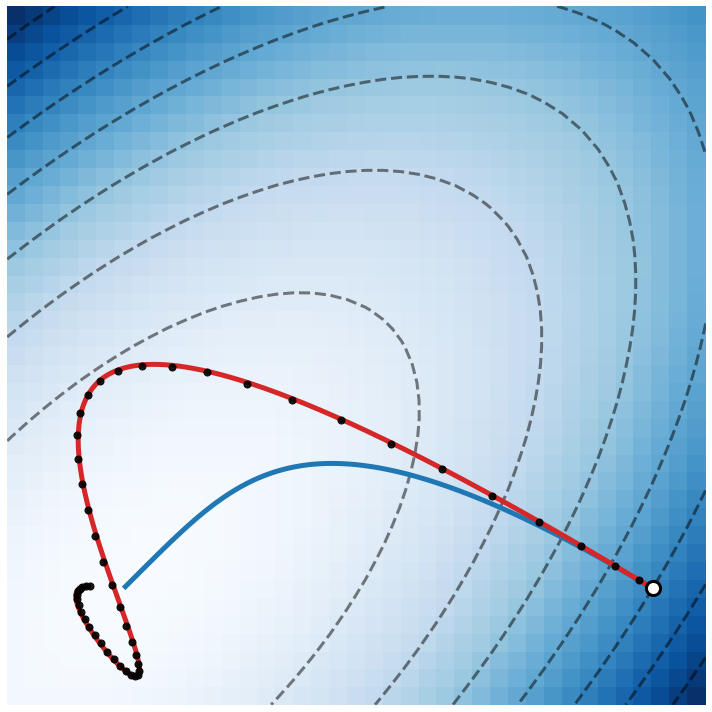

In [67]:
Sigma = np.array([4,1])
V = np.array([[-1,1],[1,1]])
V_inv = np.linalg.inv(V)
A = V_inv.dot(np.diag(Sigma)).dot(V)

def momentum_flow(w10, w20, time, beta, Sigma, V, V_inv):
    W_0 = np.array([w10, w20])
    w1 = [W_0[0]]
    w2 = [W_0[1]]
    for t in time:
        scale = np.diag(np.exp(-1/(1 - beta) * Sigma * t))
        W_t = V_inv.dot(scale.dot(V.dot(W_0)))
        w1.append(W_t[0])
        w2.append(W_t[1])
    return w1, w2

def modified_momentum_flow(w10, w20, time, eta, beta, Sigma, V, V_inv):
    W_0 = np.array([w10, w20])
    w1 = [W_0[0]]
    w2 = [W_0[1]]
    
    gamma = (1 - beta) / (eta * (1 + beta))
    omega_1 = np.sqrt(2 * Sigma[0] / (eta * (1 + beta)))
    omega_2 = np.sqrt(2 * Sigma[1] / (eta * (1 + beta)))
    
    def harmonic(gamma, omega, t):
        if gamma < omega:
            cos = np.cos(np.sqrt(omega**2 - gamma**2)*t)
            sin = np.sin(np.sqrt(omega**2 - gamma**2)*t)
            scale = np.exp(-gamma * t) * (cos + gamma / np.sqrt(omega**2 - gamma**2) * sin)
        elif gamma == omega:
            scale = np.exp(-gamma * t) * (1 + gamma * t)
        else:
            alpha_p = -gamma + np.sqrt(gamma**2 - omega**2)
            alpha_m = -gamma - np.sqrt(gamma**2 - omega**2)
            numer = alpha_p * np.exp(alpha_m * t) - alpha_m * np.exp(alpha_p * t)
            denom = alpha_p - alpha_m
            scale = numer / denom
        return scale
            
    for t in time:
        scale_1 = harmonic(gamma, omega_1, t)
        scale_2 = harmonic(gamma, omega_2, t)
        scale = np.diag([scale_1, scale_2])
        W_t = V_inv.dot(scale.dot(V.dot(W_0)))
        w1.append(W_t[0])
        w2.append(W_t[1])
    return w1, w2

def momentum(w10, w20, num_steps, eta, beta, A):
    w1 = [w10]
    w2 = [w20]
    v1 = 0
    v2 = 0
    for i in range(num_steps):
        g1 = (A[0,0] * w1[-1]  +  A[0,1] * w2[-1])
        g2 = (A[1,0] * w1[-1]  +  A[1,1] * w2[-1])
        v1 = beta * v1 + g1
        v2 = beta * v2 + g2
        w1.append(w1[-1] - eta * v1)
        w2.append(w2[-1] - eta * v2)
    return w1, w2

n = 1.1
eta=0.01
beta = 0.9
num_steps = 50
T = num_steps * eta
w10 = 1
w20 = 0
time = np.linspace(0, T, 100000)
gf_1, gf_2 = momentum_flow(w10, w20, time, beta, Sigma, V, V_inv)
gd_1, gd_2 = momentum(w10, w20, num_steps, eta, beta, A)
me_1, me_2 = modified_momentum_flow(w10, w20, time, eta, beta, Sigma * (1 + eta/2 * Sigma), V, V_inv)
# me_1, me_2 = momentum_flow(w10, w20, time, beta, Sigma * (1 + eta*(1 + beta)/(2*(1-beta)**2) * Sigma), V, V_inv)


fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(gf_1, gf_2, color=plt.cm.tab10(0), label='Gradient Flow', lw=5)
ax.plot(me_1, me_2, color=plt.cm.tab10(3), label='Modified Equation', lw=5)
ax.scatter(gd_1, gd_2, color='k', alpha=0.9, label='Gradient Descent', zorder=100, s=50)
ax.scatter(w10, w20, color='w', zorder=120, s=200, edgecolors='k', linewidth=3)

ax.axis('off')

W1, W2 = np.meshgrid(np.linspace(-n/5, n, 40), np.linspace(-n/5, n, 40))
Z = 0.5 * (A[0,0] * W1**2 + (A[0,1] + A[1,0])*W1*W2 + A[1,1] * W2**2)

ax.contour(W1, W2, Z, colors=['k'], alpha=0.5, linestyles='dashed', linewidths=3)
ax.pcolormesh(W1, W2, Z, cmap='Blues')

plt.tight_layout()
plt.savefig('modified-equation-momentum-quadtratic.pdf', format='pdf', bbox_inches='tight')